# 更多的数据效果会不会更好呢？


In [1]:
# 导入工具包
import pandas as pd

# 读取数据
features = pd.read_csv('data_set/temps_extended.csv')
features.head(5)

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


数据规模 (2191, 12)

新的数据中，数据规模发生了变化，数据量扩充到了2191条并且加入了新的天气指标：

* ws_1：前一天的风速
* prcp_1: 前一天的降水
* snwd_1：前一天的积雪深度

既然有了新的特征，先来看看他们长什么样吧，同样的方式绘制就可以了：

In [2]:
print('数据规模', features.shape)

数据规模 (2191, 12)


## 统计指标

In [3]:
round(features.describe(), 2)

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
count,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00
mean,2013.50,6.52,15.71,7.37,0.12,0.01,61.17,61.18,60.29,61.18,60.31
std,1.71,3.45,8.80,3.15,0.25,0.15,13.09,13.08,10.73,13.08,15.87
min,2011.00,1.00,1.00,0.89,0.00,0.00,29.00,29.00,45.10,29.00,25.00
25%,2012.00,4.00,8.00,5.14,0.00,0.00,51.00,51.00,50.10,51.00,49.00
50%,2014.00,7.00,16.00,6.71,0.00,0.00,60.00,60.00,58.80,60.00,60.00
75%,2015.00,10.00,23.00,9.17,0.12,0.00,71.00,71.00,70.20,71.00,71.00
max,2017.00,12.00,31.00,21.25,2.20,3.00,96.00,96.00,77.40,96.00,97.00


In [5]:
# 转换成标准格式
import datetime

# 得到各种日期数据
years = features['year']
months = features['month']
days = features['day']

# 格式转换
dates = [
    str(int(year)) + '-' + str(int(month)) + '-' + str(int(day))
    for year, month, day in zip(years, months, days)
]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 绘图
import matplotlib.pyplot as plt

%matplotlib inline

# 风格设置
plt.style.use('fivethirtyeight')

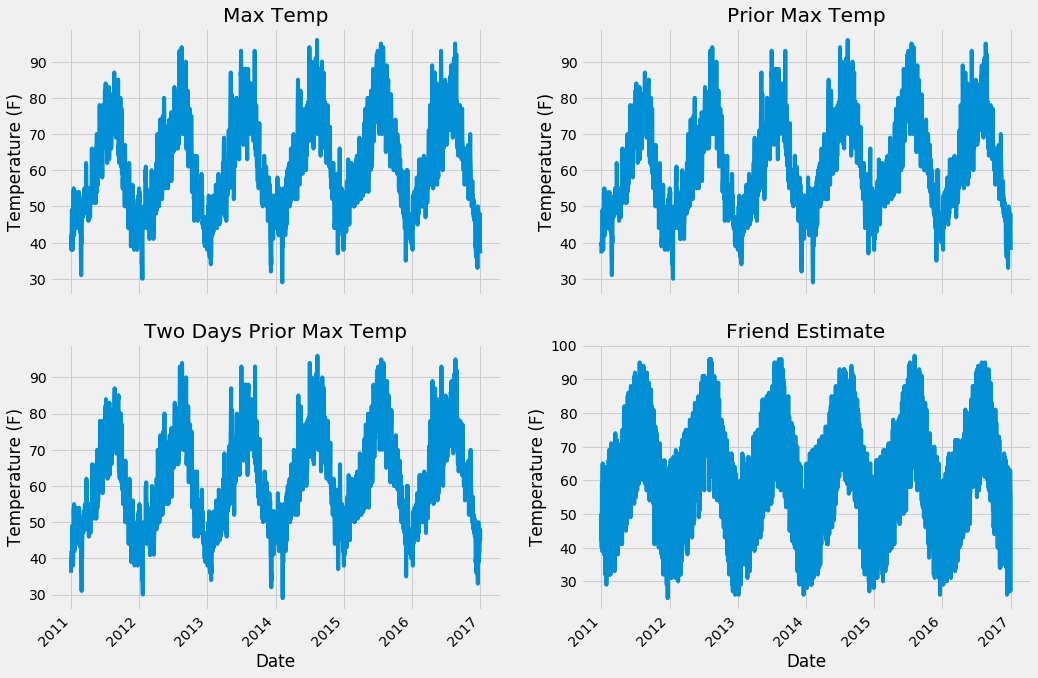

In [6]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.autofmt_xdate(rotation=45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature (F)')
ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature (F)')
ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature (F)')
ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature (F)')
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

在数据分析和特征提取的过程中，我们的出发点都是尽可能多的选择有价值的特征，因为其实阶段我们能得到的信息越多，之后建模可以利用的信息也是越多的，比如在这份数据中，我们有完整日期数据，但是显示天气的变换肯定是跟季节因素有关的，但是在原始数据集中并没有体现出季节的指标，我们可以自己创建一个季节变量当做新的特征，无论是对之后建模还是分析都会起到帮助的：

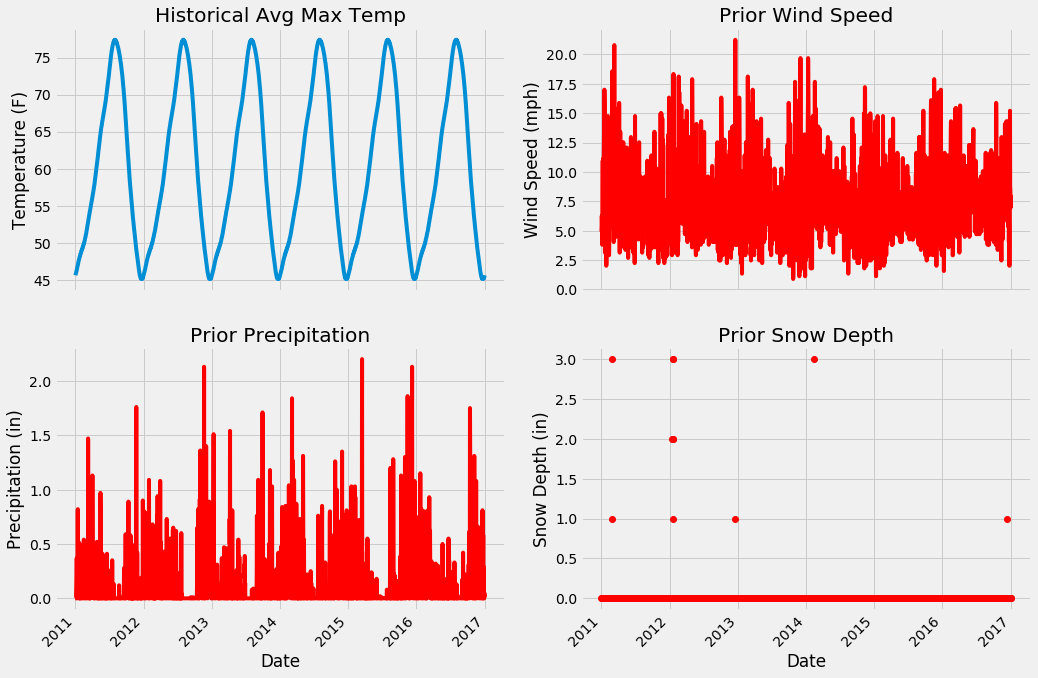

In [7]:
# 设置整体布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.autofmt_xdate(rotation=45)

# 平均最高气温
ax1.plot(dates, features['average'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature (F)')
ax1.set_title('Historical Avg Max Temp')

# 风速
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel('')
ax2.set_ylabel('Wind Speed (mph)')
ax2.set_title('Prior Wind Speed')

# 降水
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date')
ax3.set_ylabel('Precipitation (in)')
ax3.set_title('Prior Precipitation')

# 积雪
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date')
ax4.set_ylabel('Snow Depth (in)')
ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)

有了季节特征之后，假如我想观察一下不同季节的时候上述各项指标的变换情况该怎么做呢？这里给大家推荐一个非常实用的绘图函数pairplot，需要我们先安装seaborn这个工具包，它相当于是在Matplotlib的基础上进行封装，说白了就是用起来更简单规范了：

## Pairplots

最简单实用的！用它来看看这些特征有没有啥用呢！

In [8]:
# 创建一个季节变量
seasons = []

for month in features['month']:
    if month in [1, 2, 12]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')

# 有了季节我们就可以分析更多东西了
reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']]
reduced_features['season'] = seasons

D:\Programing\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


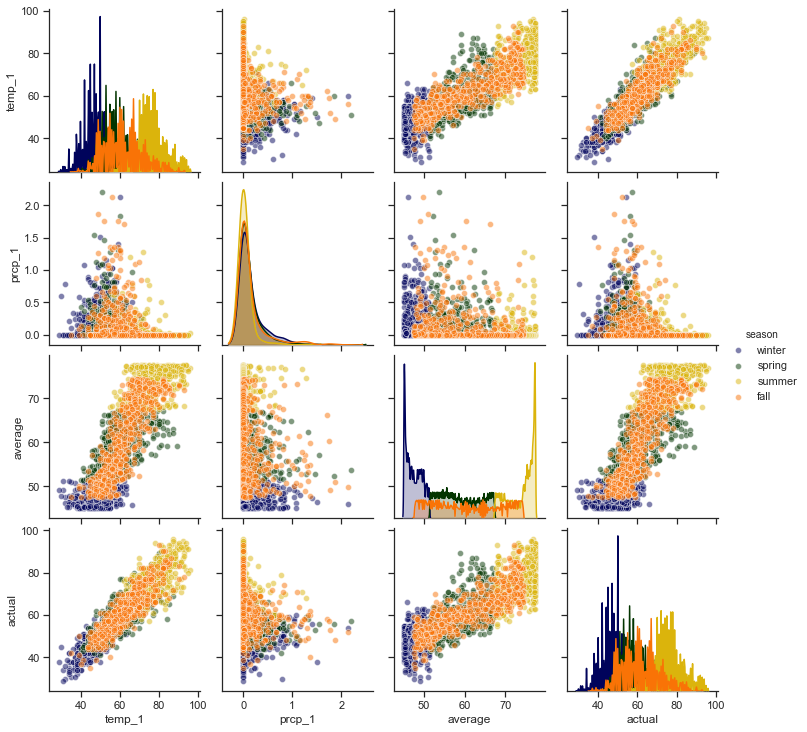

In [18]:
# 导入seaborn工具包
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# 选择你喜欢的颜色模板
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# 绘制pairplot
sns.pairplot(reduced_features,
             hue='season',
             diag_kind='kde',
             palette=palette,
             plot_kws=dict(alpha=0.5),
             diag_kws={
                 'shade': True,
                 'bw': 0.1
             })
;

可以看到，x轴和y轴都是我们这4项指标，不同颜色的点表示不同的季节，在主对角线上x轴和y轴都是相同特征表示其在不同季节时的数值分布情况，其他位置用散点图来表示两个特征之间的关系，例如在左下角temp_1和actual就呈现出了很强的相关性。

## 数据预处理

In [19]:
# 独热编码
features = pd.get_dummies(features)

# 提取特征和标签
labels = features['actual']
features = features.drop('actual', axis=1)

# 特征名字留着备用
feature_list = list(features.columns)

# 转换成所需格式
import numpy as np

features = np.array(features)
labels = np.array(labels)

# 数据集切分
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.25, random_state=0)

In [20]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1643, 17)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 17)
Testing Labels Shape: (548,)


新的训练集由1643个样本组成，测试集有548个样本。先来看看老数据集的情况，这里由于我们重新打开了一个新的notebook，所有代码中重新读取了老温度数据集，并进行了相同的预处理操作：

## 先来看看老数据的结果

In [22]:
# 工具包导入
import pandas as pd

# 为了剔除特征个数对结果的影响，这里特征统一只有老数据集中特征
original_feature_indices = [
    feature_list.index(feature)
    for feature in feature_list
    if feature not in ['ws_1', 'prcp_1', 'snwd_1']
]

# 读取老数据集
original_features = pd.read_csv('data_set/temps.csv')

original_features = pd.get_dummies(original_features)

import numpy as np

# 数据和标签转换
original_labels = np.array(original_features['actual'])

original_features = original_features.drop('actual', axis=1)

original_feature_list = list(original_features.columns)

original_features = np.array(original_features)

# 数据集切分
from sklearn.model_selection import train_test_split

original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(
    original_features, original_labels, test_size=0.25, random_state=42)

# 同样的树模型进行建模
from sklearn.ensemble import RandomForestRegressor

# 同样的参数与随机种子
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# 这里的训练集使用的是老数据集的
rf.fit(original_train_features, original_train_labels)

# 为了测试效果能够公平，统一使用一致的测试集，这里选择了刚刚我切分过的新数据集的测试集
predictions = rf.predict(test_features[:, original_feature_indices])

# 先计算温度平均误差
errors = abs(predictions - test_labels)

print('平均温度误差:', round(np.mean(errors), 2), 'degrees.')

# MAPE
mape = 100 * (errors / test_labels)

# 这里的Accuracy为了方便观察，我们就用100减去误差了，希望这个值能够越大越好
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

平均温度误差: 4.67 degrees.
Accuracy: 92.2 %.


可以看到，当我们把数据量增大之后，效果发生了一些提升，这也符合实际情况，在机器学习任务中，我们都是希望数据量能够越大越好，这样可利用的信息就更多了。
下面我们要再对比一下特征数量对结果的影响，之前这两次比较还没有加入新的特征，这回我们把降水，风速，积雪3特征加入训练集中，看看效果又会怎样：

## 新数据来了，只增大数据量的话，结果会提升吗

In [23]:
from sklearn.ensemble import RandomForestRegressor

# 剔除掉新的特征，保证数据特征是一致的
original_train_features = train_features[:, original_feature_indices]

original_test_features = test_features[:, original_feature_indices]

rf = RandomForestRegressor(n_estimators=100, random_state=0)

rf.fit(original_train_features, train_labels)

# 预测
baseline_predictions = rf.predict(original_test_features)

# 结果
baseline_errors = abs(baseline_predictions - test_labels)

print('平均温度误差:', round(np.mean(baseline_errors), 2), 'degrees.')

# (MAPE)
baseline_mape = 100 * np.mean((baseline_errors / test_labels))

# accuracy
baseline_accuracy = 100 - baseline_mape
print('Accuracy:', round(baseline_accuracy, 2), '%.')

平均温度误差: 4.2 degrees.
Accuracy: 93.12 %.


## 加入新特征再来看一看

In [24]:
# 准备加入新的特征
from sklearn.ensemble import RandomForestRegressor

rf_exp = RandomForestRegressor(n_estimators=100, random_state=0)
rf_exp.fit(train_features, train_labels)

RandomForestRegressor(random_state=0)

In [25]:
# 同样的测试集
predictions = rf_exp.predict(test_features)

# 评估
errors = abs(predictions - test_labels)

print('平均温度误差:', round(np.mean(errors), 2), 'degrees.')

# (MAPE)
mape = np.mean(100 * (errors / test_labels))

# 看一下提升了多少
improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
print('特征增多后模型效果提升:', round(improvement_baseline, 2), '%.')

# accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

平均温度误差: 4.05 degrees.
特征增多后模型效果提升: 3.34 %.
Accuracy: 93.35 %.


模型整体效果有了略微提升，这里我们还加入一项额外的评估就是模型跟基础模型相比提升的大小，方便来进行对比观察。这回特征也多了，我们可以好好研究下特征重要性这个指标了，虽说其只供参考，但是业界也有一些不成文的行规我们来看一下：

### 特征重要性

In [27]:
# 特征名字
importances = list(rf_exp.feature_importances_)

# 名字，数值组合在一起
feature_importances = [(feature, round(importance, 2))
                       for feature, importance in zip(feature_list, importances)
                      ]

# 排序
feature_importances = sorted(feature_importances,
                             key=lambda x: x[1],
                             reverse=True)

# 打印出来
[
    print('Variable: {:20} Importance: {}'.format(*pair))
    for pair in feature_importances
]
;

Variable: temp_1               Importance: 0.85
Variable: average              Importance: 0.05
Variable: ws_1                 Importance: 0.02
Variable: friend               Importance: 0.02
Variable: year                 Importance: 0.01
Variable: month                Importance: 0.01
Variable: day                  Importance: 0.01
Variable: prcp_1               Importance: 0.01
Variable: temp_2               Importance: 0.01
Variable: snwd_1               Importance: 0.0
Variable: weekday_Fri          Importance: 0.0
Variable: weekday_Mon          Importance: 0.0
Variable: weekday_Sat          Importance: 0.0
Variable: weekday_Sun          Importance: 0.0
Variable: weekday_Thurs        Importance: 0.0
Variable: weekday_Tues         Importance: 0.0
Variable: weekday_Wed          Importance: 0.0


#### Visualize Feature Importances

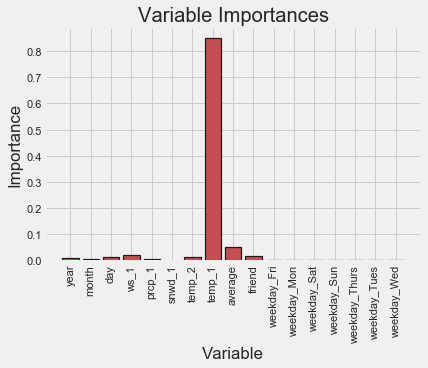

In [28]:
# 指定风格
plt.style.use('fivethirtyeight')

# 指定位置
x_values = list(range(len(importances)))

# 绘图
plt.bar(x_values,
        importances,
        orientation='vertical',
        color='r',
        edgecolor='k',
        linewidth=1.2)

# x轴名字得竖着写
plt.xticks(x_values, feature_list, rotation='vertical')

# 图名
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
;

之前我们只是简单看了下载特征中哪些更重要，这回我们需要考虑的是特征的累加重要性，先把特征按照其重要性进行排序，再算起累计值，这里用到了cumsum()函数，比如cusm([1,2,3,4])得到的结果就是其累加值(1,3,6,10)，通常我们都以95%为阈值，看看有多少个特征累加在一起之后，其特征重要性的累加值超过该阈值，就取它们当做筛选后的特征：

## 特征重要性累加，看看95%之前有多少个

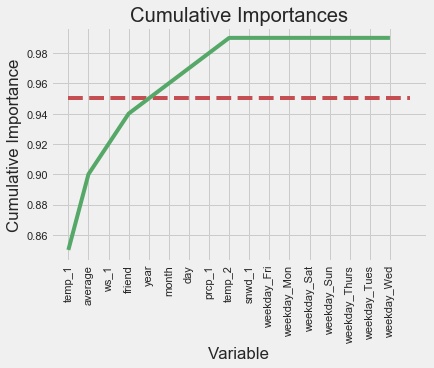

In [29]:
# 对特征进行排序
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# 累计重要性
cumulative_importances = np.cumsum(sorted_importances)

# 绘制折线图
plt.plot(x_values, cumulative_importances, 'g-')

# 画一条红色虚线，0.95那
plt.hlines(y=0.95,
           xmin=0,
           xmax=len(sorted_importances),
           color='r',
           linestyles='dashed')

# X轴
plt.xticks(x_values, sorted_features, rotation='vertical')

# Y轴和名字
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')
;

这里当第5个特征出现的时候，其总体的累加值超过了95%，那么接下来我们的对比实验又来了，如果只用这5个特征效果会怎么样呢？时间效率又会怎样呢？

### 把他们列出来吧！

In [30]:
# 看看有几个特征
print('Number of features for 95% importance:',
      np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 5


## 训练集和测试集要使用一样的

In [31]:
# 选择这些特征
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# 找到它们的名字
important_indices = [
    feature_list.index(feature) for feature in important_feature_names
]

# 重新创建训练集
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# 数据维度
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (1643, 5)
Important test features shape: (548, 5)


### 有这些重要的重新训练

In [32]:
# 再训练模型
rf_exp.fit(important_train_features, train_labels)
;

### 瞅瞅咋样吧！

In [33]:
# 同样的测试集
predictions = rf_exp.predict(important_test_features)

# 评估结果
errors = abs(predictions - test_labels)

print('平均温度误差:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / test_labels)

# accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

平均温度误差: 4.11 degrees.
Accuracy: 93.28 %.


效果反而下降了，其实随机森林的算法本身就会考虑特征的问题，会优先选择有价值的，我们认为的去掉一些，相当于可供候选的就少了，出现这样的现象在随机森林中并不奇怪！

## 计算下 Trade-Offs

看起来奇迹并没有出现，本以为效果反而会更好，其实还有一点点下降，这里可能由于是树模型本身具有特征选择的被动技能了。虽然模型没有提升，我们还可以再看看在时间效率的层面上有没有进步呢：

In [35]:
# 要计算时间了
import time

# 这次是用所有特征
all_features_time = []

# 算一次可能不太准，来10次取个平均
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(train_features, train_labels)
    all_features_predictions = rf_exp.predict(test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('使用所有特征时建模与测试的平均时间消耗:', round(all_features_time, 4), '秒.')

使用所有特征时建模与测试的平均时间消耗: 0.9691 秒.


当我们使用全部特征的时候，建模与测试用的总时间为0.5秒，这里会由于机器性能导致咱们的速度不一样，大家在笔记本中估计运行时间要比我的稍长一点。再来看看只选择高重要性特征的时间结果：

In [37]:
# 这次是用部分重要的特征
reduced_features_time = []

# 算一次可能不太准，来10次取个平均
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(important_train_features, train_labels)
    reduced_features_predictions = rf_exp.predict(important_test_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)

reduced_features_time = np.mean(reduced_features_time)
print('使用所有特征时建模与测试的平均时间消耗:', round(reduced_features_time, 4), '秒.')

使用所有特征时建模与测试的平均时间消耗: 0.6112 秒.


### Accuracy vs Run-Time

In [38]:
# 用分别的预测值来计算评估结果
all_accuracy = 100 * (
    1 - np.mean(abs(all_features_predictions - test_labels) / test_labels))
reduced_accuracy = 100 * (
    1 - np.mean(abs(reduced_features_predictions - test_labels) / test_labels))

#创建一个df来保存结果
comparison = pd.DataFrame({
    'features': ['all (17)', 'reduced (5)'],
    'run_time': [round(all_features_time, 2),
                 round(reduced_features_time, 4)],
    'accuracy': [round(all_accuracy, 2),
                 round(reduced_accuracy, 4)]
})

comparison[['features', 'accuracy', 'run_time']]

,features,accuracy,run_time
0,all (17),93.3500,0.9700
1,reduced (5),93.2835,0.6112


实际中我们也得综合来考虑下性能问题！时间速度别跟我机器比。。。我是专业吃鸡主机！

In [39]:
relative_accuracy_decrease = 100 * (all_accuracy -
                                    reduced_accuracy) / all_accuracy
print('相对accuracy下降:', round(relative_accuracy_decrease, 3), '%.')

relative_runtime_decrease = 100 * (all_features_time -
                                   reduced_features_time) / all_features_time
print('相对时间效率提升:', round(relative_runtime_decrease, 3), '%.')

相对accuracy下降: 0.071 %.
相对时间效率提升: 36.935 %.


性价比！！！

通常我们买东西都会考虑性价比，这里同样也是这个问题，时间效率的提升相对更大一些，而且基本保证了模型效果是差不多的。
最后让我们把所有的实验结果汇总到一起来进行对比吧：

In [42]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
original_features = pd.read_csv('data_set/temps.csv')
original_features = pd.get_dummies(original_features)

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
original_labels = np.array(original_features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
original_features = original_features.drop('actual', axis=1)

# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Convert to numpy array
original_features = np.array(original_features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(
    original_features, original_labels, test_size=0.25, random_state=42)

In [43]:
# Find the original feature indices
original_feature_indices = [
    feature_list.index(feature)
    for feature in feature_list
    if feature not in ['ws_1', 'prcp_1', 'snwd_1']
]

# Create a test set of the original features
original_test_features = test_features[:, original_feature_indices]

# Time to train on original data set (1 year)
original_features_time = []

# Do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf.fit(original_train_features, original_train_labels)
    original_features_predictions = rf.predict(original_test_features)
    end_time = time.time()
    original_features_time.append(end_time - start_time)

original_features_time = np.mean(original_features_time)

In [44]:
# Calculate mean absolute error for each model
original_mae = np.mean(abs(original_features_predictions - test_labels))
exp_all_mae = np.mean(abs(all_features_predictions - test_labels))
exp_reduced_mae = np.mean(abs(reduced_features_predictions - test_labels))

# Calculate accuracy for model trained on 1 year of data
original_accuracy = 100 * (
    1 - np.mean(abs(original_features_predictions - test_labels) / test_labels))

# Create a dataframe for comparison
model_comparison = pd.DataFrame({
    'model': ['original', 'exp_all', 'exp_reduced'],
    'error (degrees)': [original_mae, exp_all_mae, exp_reduced_mae],
    'accuracy': [original_accuracy, all_accuracy, reduced_accuracy],
    'run_time (s)': [
        original_features_time, all_features_time, reduced_features_time
    ]
})

# Order the dataframe
model_comparison = model_comparison[[
    'model', 'error (degrees)', 'accuracy', 'run_time (s)'
]]

In [45]:
model_comparison

,model,error (degrees),accuracy,run_time (s)
0,original,4.667628,92.202816,0.269280
1,exp_all,4.049051,93.349629,0.969110
2,exp_reduced,4.113084,93.283485,0.611167


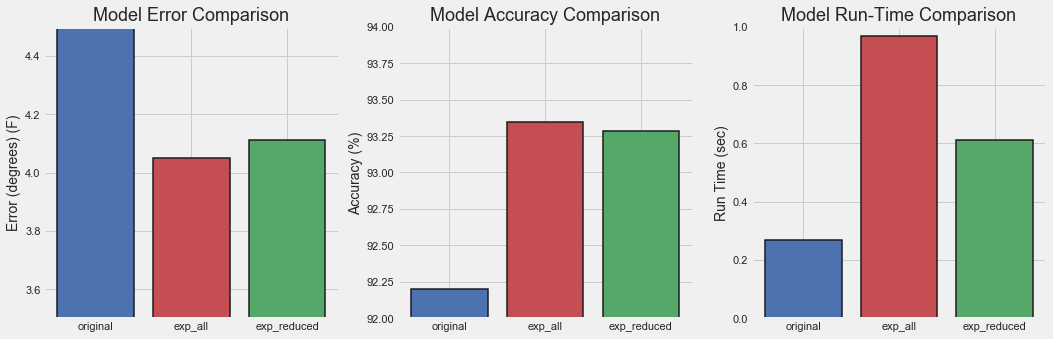

In [46]:
# 绘图来总结把
# 设置总体布局，还是一整行看起来好一些
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(16, 5),
                                    sharex=True)

# X轴
x_values = [0, 1, 2]
labels = list(model_comparison['model'])
plt.xticks(x_values, labels)

# 字体大小
fontdict = {'fontsize': 18}
fontdict_yaxis = {'fontsize': 14}

# 预测温度和真实温度差异对比
ax1.bar(x_values,
        model_comparison['error (degrees)'],
        color=['b', 'r', 'g'],
        edgecolor='k',
        linewidth=1.5)
ax1.set_ylim(bottom=3.5, top=4.5)
ax1.set_ylabel('Error (degrees) (F)', fontdict=fontdict_yaxis)
ax1.set_title('Model Error Comparison', fontdict=fontdict)

# Accuracy 对比
ax2.bar(x_values,
        model_comparison['accuracy'],
        color=['b', 'r', 'g'],
        edgecolor='k',
        linewidth=1.5)
ax2.set_ylim(bottom=92, top=94)
ax2.set_ylabel('Accuracy (%)', fontdict=fontdict_yaxis)
ax2.set_title('Model Accuracy Comparison', fontdict=fontdict)

# 时间效率对比
ax3.bar(x_values,
        model_comparison['run_time (s)'],
        color=['b', 'r', 'g'],
        edgecolor='k',
        linewidth=1.5)
ax3.set_ylim(bottom=0, top=1)
ax3.set_ylabel('Run Time (sec)', fontdict=fontdict_yaxis)
ax3.set_title('Model Run-Time Comparison', fontdict=fontdict)
;

original代表是我们的老数据，也就是量少特征少的那份；exp_all代表我们的完整新数据；exp_reduced代表我们按照95%阈值选择的部分重要特征数据集。结果也是很明显的，数据量和特征越多，效果会提升一些，但是时间效率也会有所下降。